# PyKeen Test & PyTorch


## Hypothesis 1
Expit transformed probs of RotatE and TranX can only rangin within $[0, 1]$

## Hypothesis 2
Vanilla FNN whose $n-1$th layer has only one node and uses ReLU as activation can only output values range within $[0, 1]$

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.special import expit

from pykeen.pipeline import pipeline
from pykeen.datasets import Nations, YAGO310
from pykeen.models.predict import predict_triples_df, predict

In [12]:
# plt.rc('figure', dpi=150) # default for me was 75
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

scoring:   0%|          | 0.00/770 [00:00<?, ?batch/s]

Text(0.5, 0, 'probs')

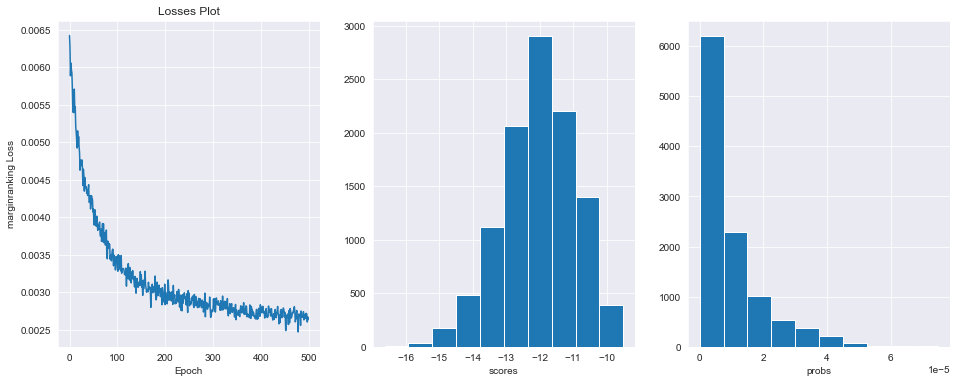

In [15]:
# transe_res = pipeline(model='TransE', dataset=Nations, epochs=500, use_tqdm=False) 
transE_scores = predict(model=transe_res.model, mode='testing').scores

fig, axes = plt.subplots(1, 3, figsize=(16,6))
transe_res.plot_losses(ax=axes[0])
axes[1].hist(transE_scores)
axes[2].hist(expit(transE_scores))
axes[1].set_xlabel('scores')
axes[2].set_xlabel('probs')

scoring:   0%|          | 0.00/770 [00:00<?, ?batch/s]

(array([2271., 1826., 1793., 1411., 1082.,  798.,  974.,  420.,  163.,
          42.]),
 array([0.00087234, 0.04502752, 0.0891827 , 0.13333789, 0.17749307,
        0.22164825, 0.26580343, 0.3099586 , 0.3541138 , 0.39826897,
        0.44242415], dtype=float32),
 <BarContainer object of 10 artists>)

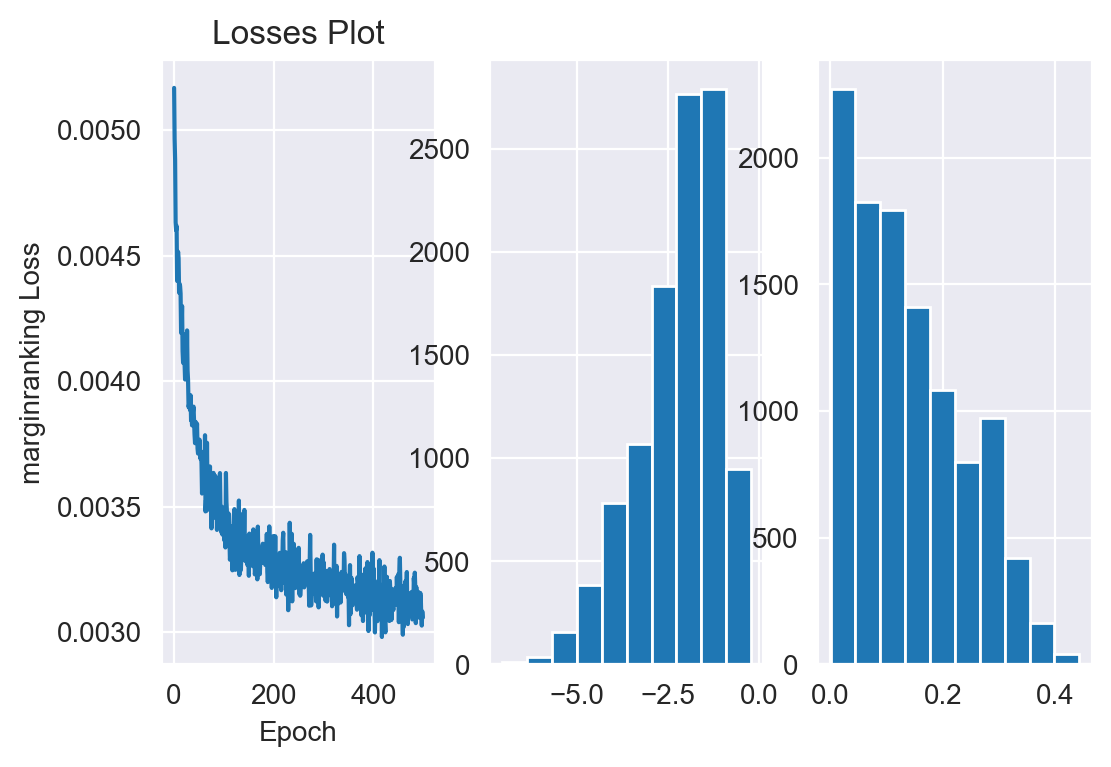

In [67]:
transD_res = pipeline(model='TransD', dataset=Nations, epochs=500, use_tqdm=False) 
transD_scores = predict(model=transD_res.model).scores

fig, axes = plt.subplots(1, 3)
transD_res.plot_losses(ax=axes[0])
axes[1].hist(transD_scores)
axes[2].hist(expit(transD_scores))

(array([ 930., 2296., 3148., 2600., 1038.,  432.,  206.,   88.,   33.,
           9.]),
 array([0.003336  , 0.00834811, 0.01336022, 0.01837233, 0.02338445,
        0.02839656, 0.03340867, 0.03842079, 0.0434329 , 0.04844501,
        0.05345712], dtype=float32),
 <BarContainer object of 10 artists>)

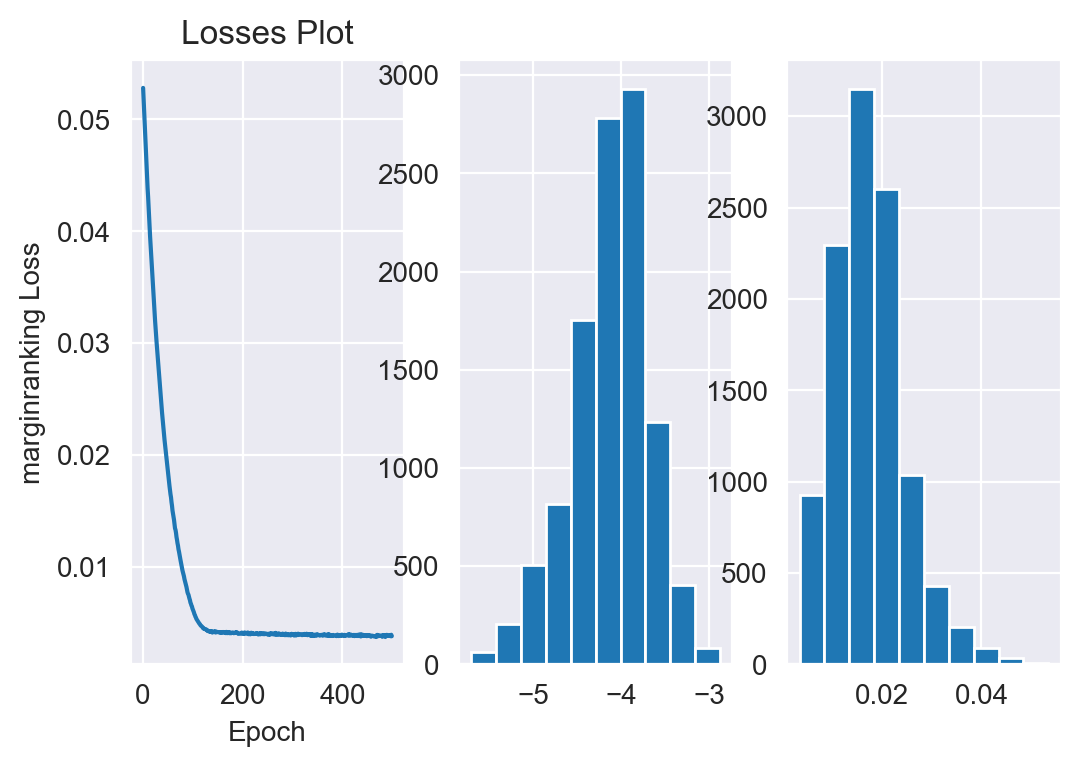

In [69]:
TransH_res = pipeline(modelmodel=Trans='TransH', dataset=Nations, epochs=500, use_tqdm=False) 
TransH_scores = predict(H_res.model, mode='testing').scores

fig, axes = plt.subplots(1, 3)
TransH_res.plot_losses(ax=axes[0])
axes[1].hist(TransH_scores)
axes[2].hist(expit(TransH_scores))

scoring:   0%|          | 0.00/770 [00:00<?, ?batch/s]

(array([8.876e+03, 1.176e+03, 4.350e+02, 2.060e+02, 4.500e+01, 1.800e+01,
        8.000e+00, 6.000e+00, 6.000e+00, 4.000e+00]),
 array([9.4401612e-06, 6.6198977e-03, 1.3230355e-02, 1.9840812e-02,
        2.6451271e-02, 3.3061728e-02, 3.9672185e-02, 4.6282642e-02,
        5.2893102e-02, 5.9503559e-02, 6.6114016e-02], dtype=float32),
 <BarContainer object of 10 artists>)

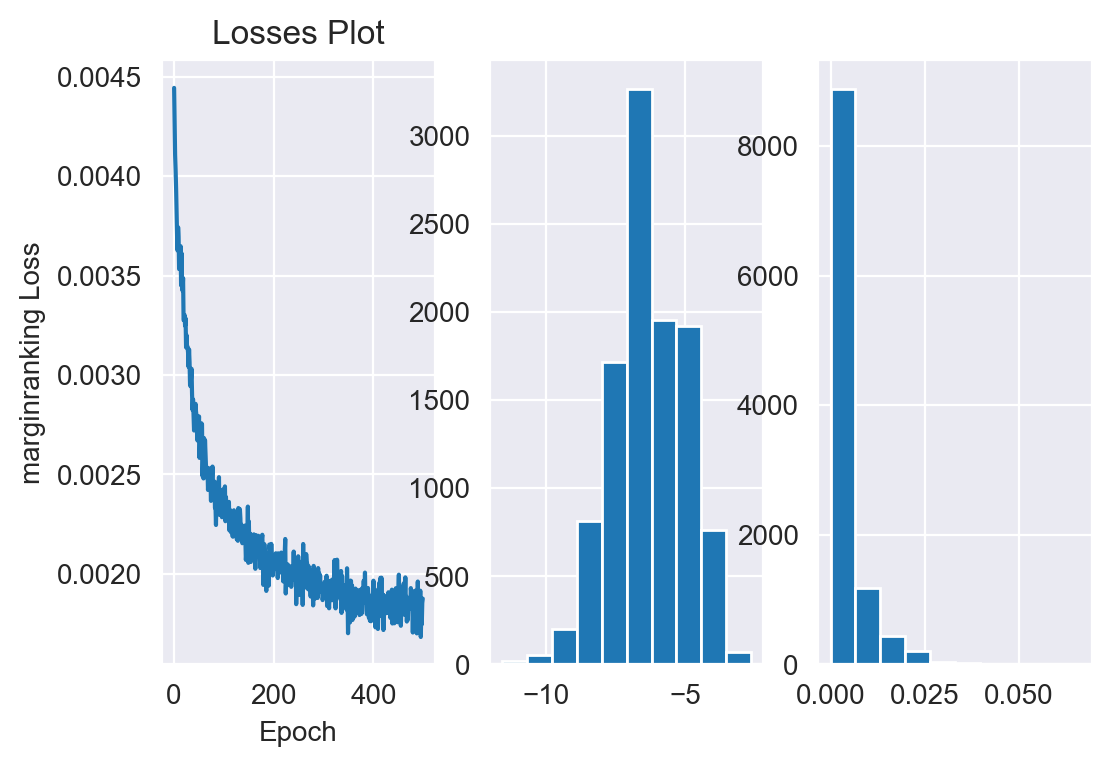

In [70]:
TransR_res = pipeline(model='TransR', dataset=Nations, epochs=500, use_tqdm=False) 
TransR_scores = predict(model=TransR_res.model).scores

fig, axes = plt.subplots(1, 3)
TransR_res.plot_losses(ax=axes[0])
axes[1].hist(TransR_scores)
axes[2].hist(expit(TransR_scores))

scoring:   0%|          | 0.00/770 [00:00<?, ?batch/s]

(array([1.0734e+04, 2.6000e+01, 1.1000e+01, 1.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.4907722e-33, 8.7912485e-29, 1.7582348e-28, 2.6373446e-28,
        3.5164546e-28, 4.3955644e-28, 5.2746743e-28, 6.1537843e-28,
        7.0328943e-28, 7.9120043e-28, 8.7911143e-28], dtype=float32),
 <BarContainer object of 10 artists>)

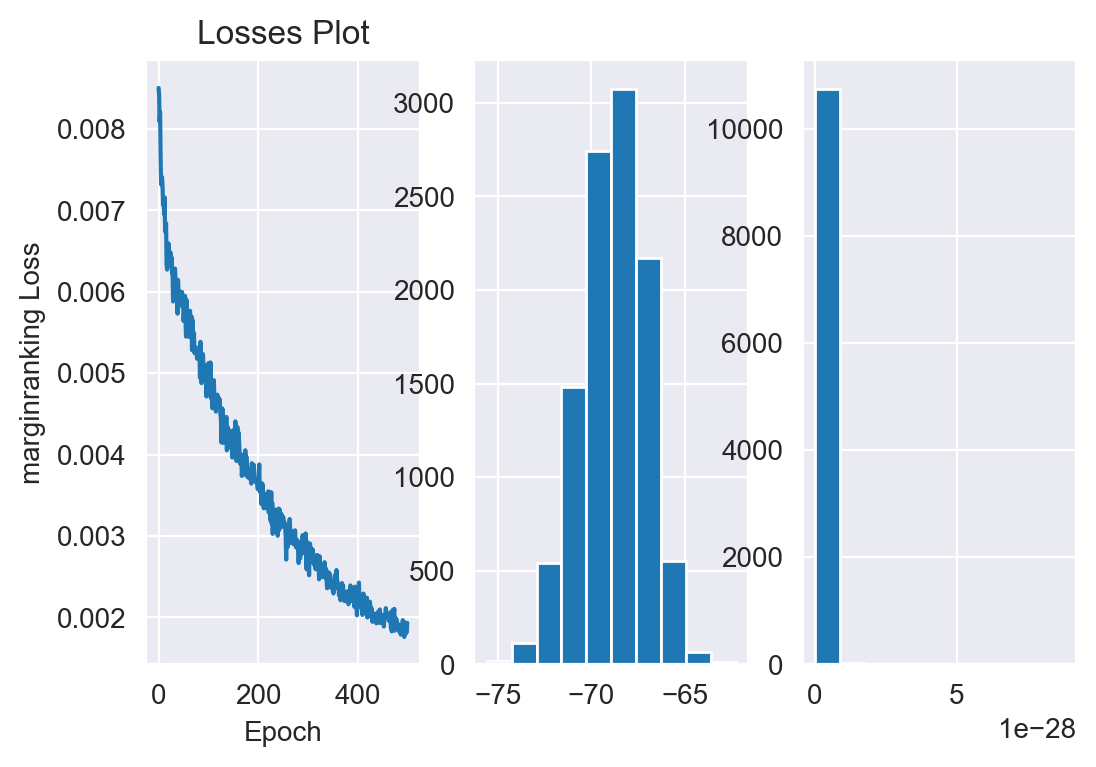

In [71]:
RotatE_res = pipeline(model='RotatE', dataset=Nations, epochs=500, use_tqdm=False) 
RotatE_scores = predict(model=RotatE_res.model).scores

fig, axes = plt.subplots(1, 3)
RotatE_res.plot_losses(ax=axes[0])
axes[1].hist(RotatE_scores)
axes[2].hist(expit(RotatE_scores))

## Hypothesis 2

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [81]:
# Download training data from open datasets.
training_data = datasets.PCAM(
    root="data",
    split='train',
    # train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.PCAM(
    root="data",
    split='test',
    # train=False,
    download=True,
    transform=ToTensor(),
)

0it [00:00, ?it/s]

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(96*96, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
            # nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using {device} device")

model = NeuralNetwork().to(device)
# print(model)

X = torch.rand(1, 96, 96, device=device)
logits = model(X)
print(logits)
# pred_probab = nn.Softmax(dim=1)(logits)

# y_pred = pred_probab.argmax(1)
print(pred_probab)

tensor([[0.]], grad_fn=<ReluBackward0>)
tensor([[1.]], grad_fn=<SoftmaxBackward0>)
